<a href="https://colab.research.google.com/github/pbdnair/intellipat_demo/blob/main/20th_Feb_Image_Aug%2C_Intro_to_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Learnings from Dog Vs Cat 
# 1. Even with the least exp model we have 6.75M parameters 
# 2. Not enough data (25K seems less)

# Image Augumentation

In [ ]:
! mkdir -p /root/.kaggle 
! mv kaggle.json /root/.kaggle

In [ ]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.1MB/s]
 95% 257M/271M [00:01<00:00, 206MB/s]
100% 271M/271M [00:01<00:00, 206MB/s]
 97% 528M/543M [00:03<00:00, 160MB/s]
100% 543M/543M [00:03<00:00, 179MB/s]


In [ ]:
!unzip train.zip

In [ ]:
# train_data 
#    | - cat 
#    | - dog

In [ ]:
import os
os.mkdir("train_data")
os.mkdir("train_data/cat")
os.mkdir("train_data/dog")

In [ ]:
from shutil import copy

In [ ]:
for imageName in os.listdir("train/"):
  if "cat" in imageName: 
    copy("train/" + imageName, "train_data/cat")
  elif 'dog' in imageName:
    copy("train/" + imageName, "train_data/dog")
  else:
    print(imageName)

In [ ]:
len(os.listdir("train_data/cat"))

12500

In [ ]:
import tensorflow as tf

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True, 
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! mkdir testAug

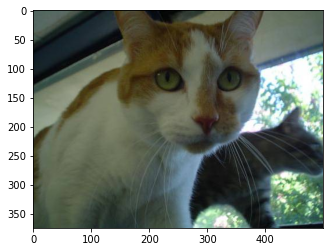

In [ ]:
timage = cv2.imread("train/cat.10082.jpg")
timage = cv2.cvtColor(timage, cv2.COLOR_BGR2RGB)
timage = np.expand_dims(timage, axis=0)
timage.shape
plt.imshow(timage[0])

In [ ]:
# ! rm -rf testAug

In [ ]:
i = 0 
for _ in idg.flow(timage, batch_size=1, save_to_dir="testAug"):
  i = i + 1
  if i > 21:
    break

In [ ]:
testI = []
for i in os.listdir("testAug"):
  i = cv2.cvtColor(cv2.imread("testAug/" + i), cv2.COLOR_BGR2RGB)
  testI.append(i)

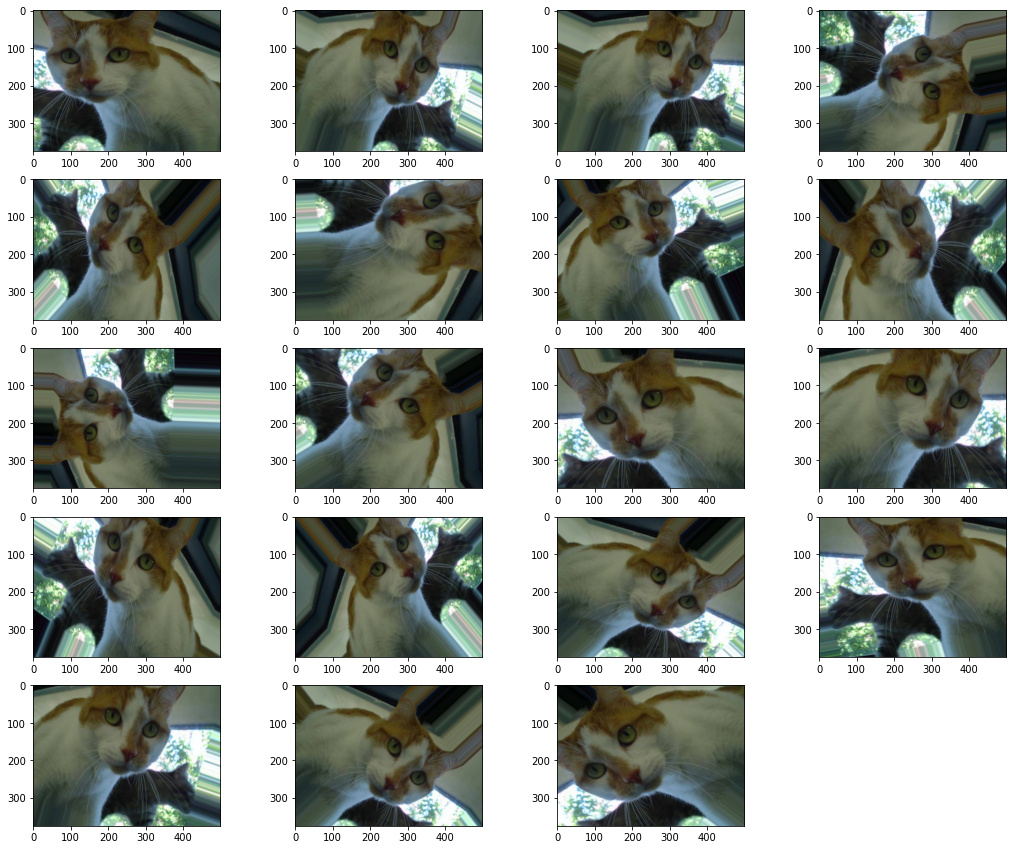

In [ ]:
plt.figure(figsize=(18, 15))
for i in range(1, 20):
  plt.subplot(5, 4, i)
  plt.imshow(testI[i-1])

In [ ]:
# imgaug
# https://imgaug.readthedocs.io/en/latest/source/examples_basics.html 

In [ ]:
# Convolutional Neural Network! 

In [ ]:
150 * 150 * 3

67500

In [ ]:
7* 7* 512

25088

In [ ]:
(((67500 * 100) + 100) * 50) + 50 

337505050

In [ ]:
(((25088 * 100) + 100) * 50) + 50

125445050